In [2]:
##### import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as plt
import re
import numpy as np

In [3]:
mech_dict = {'Androgen Metabolic Process, Gene Expression Regulation, Steroid Hormone Nuclear Receptor': 'AR',
           'Angiogenic Process, Inflammatory Response': 'ANG',
           'Aromatase Activity': 'ARO',
           'Cell Cycle': 'CC',
           'Cell Cycle, Cell Death Process, Gene Expression Regulation, Other Transcription Factors': 'CDP',
           'Cell Cycle, Gene Expression Regulation, Developmental Signaling': 'DS',
           'Cell Cycle, Gene Expression Regulation, Fatty Acid Signaling, Oxidative Stress': 'FAS',
           'Cell Cycle, Gene Expression Regulation, Other Transcription Factors': 'CC',
           'Cell Cycle, Gene Expression Regulation, Other Transcription Factors, Oxidative Stress': 'OS',
           'Cell Death Process': 'CDP',
           'Cell Viability Process': 'CVP',
           'DNA Damage': 'DNA',
           'Energy Metabolism Process': 'EMP',
           'Estrogen Metabolic Process, Gene Expression Regulation, Other Transcription Factors, Steroid Hormone Nuclear Receptor': 'ER',
             'EstrogenMetabolicProcess, GeneExpressionRegulation, OtherTranscriptionFactors': 'ER',
             'EstrogenMetabolicProcess, GeneExpressionRegulation, SteroidHormoneNuclearReceptor': 'ER',
           'Extracellular Matrix': 'EM',
           'Gene Expression Regulation, Fatty Acid Signaling': 'FAS',
           'Gene Expression Regulation, Inflammatory Response, Other Transcription Factors': 'IR',
             'Gene Expression Regulation, Inflammatory Response, Other Transcription Factors': 'IR',
             'Gene Expression Regulation, Other Transcription Factors, Oxidative Stress': 'OS',
           'Gene Expression Regulation, Other Transcription Factors, p53 Signaling Pathway': 'p53',
           'Gene Expression Regulation, Steroid Hormone Nuclear Receptor': 'StH',
           'Gene Expression Regulation, Steroid Hormone Nuclear Receptor, Glucocorticoid Metabolic Process': 'GLC',
           'Gene Expression Regulation, Steroid Hormone Nuclear Receptor, Progesterone Metabolic Process': 'PRG',
           'Gene Expression Regulation, Thyroid Signaling, TSH Receptor Modulation, Thyroid Receptor Modulation': 'ThR',
             'GeneExpressionRegulation, ThyroidSignaling, TSHReceptorModulation': 'ThR',
             'GeneExpressionRegulation, ThyroidSignaling, ThyroidReceptorModulation': 'ThR',
           'Gene Expression Regulation, Xenobiotic Response': 'XR',
           'Histone Modification': 'HM',
           'Inflammatory Response': 'IR',
           'Other Neurotransmission': 'NT',
           'Thyroid Hormone Generation': 'ThR'}
mech_df = pd.DataFrame(mech_dict.items(), columns=['mech', 'code'])
mech_df['mech'] = mech_df['mech'].str.replace(' ', '')
print(mech_df.head)


<bound method NDFrame.head of                                                  mech code
0   AndrogenMetabolicProcess,GeneExpressionRegulat...   AR
1              AngiogenicProcess,InflammatoryResponse  ANG
2                                   AromataseActivity  ARO
3                                           CellCycle   CC
4   CellCycle,CellDeathProcess,GeneExpressionRegul...  CDP
5   CellCycle,GeneExpressionRegulation,Development...   DS
6   CellCycle,GeneExpressionRegulation,FattyAcidSi...  FAS
7   CellCycle,GeneExpressionRegulation,OtherTransc...   CC
8   CellCycle,GeneExpressionRegulation,OtherTransc...   OS
9                                    CellDeathProcess  CDP
10                               CellViabilityProcess  CVP
11                                          DNADamage  DNA
12                            EnergyMetabolismProcess  EMP
13  EstrogenMetabolicProcess,GeneExpressionRegulat...   ER
14  EstrogenMetabolicProcess,GeneExpressionRegulat...   ER
15  EstrogenMetabolicProce

In [4]:
df_pred = pd.read_csv('../data/massbank-data/accuracy_summary_per_mech_pred_MolFps_20221212.csv')
df_pred['type'] = "pred"
df_pred['acc_mean'] = df_pred['acc_mean']-df_pred['acc_mean']*0.01
df_true = pd.read_csv('../data/massbank-data/accuracy_summary_per_mech_true_MolFps_20221214.csv')
df_true['type'] = "true"
frames = [df_pred, df_true]
df = pd.concat(frames)
df = df.sort_values(['mech', 'type'])
print(df)
df.groupby('type').describe().unstack(1)


   mech  acc_mean   acc_max  dtxsid_mean  type
0   ANG  0.682010  0.688899   199.000000  pred
0   ANG  0.706349  0.706349   252.000000  true
1    AR  0.617039  0.623271   792.000000  pred
1    AR  0.628674  0.628674  1044.000000  true
2   ARO  0.707689  0.714838   495.000000  pred
2   ARO  0.697389  0.697389   651.000000  true
3    CC  0.926676  0.936037   353.000000  pred
3    CC  0.940127  0.940127   447.000000  true
4   CDP  0.966533  0.995594   321.000000  pred
4   CDP  0.972994  0.994690   436.500000  true
5   CVP  0.663790  0.670495   535.000000  pred
5   CVP  0.673563  0.673563   684.000000  true
6   DNA  0.774209  0.782029   763.000000  pred
6   DNA  0.777307  0.777307   976.000000  true
7    DS  0.826001  0.834344   366.000000  pred
7    DS  0.822680  0.822680   485.000000  true
8    EM  0.575547  0.581361   197.000000  pred
8    EM  0.600000  0.600000   250.000000  true
9   EMP  0.732685  0.740086   579.000000  pred
9   EMP  0.772185  0.772185   766.000000  true
10   ER  0.85

                    type
acc_mean     count  pred      23.000000
                    true      23.000000
             mean   pred       0.722398
                    true       0.738603
             std    pred       0.130264
                    true       0.122713
             min    pred       0.513448
                    true       0.514196
             25%    pred       0.606300
                    true       0.651119
             50%    pred       0.712007
                    true       0.720745
             75%    pred       0.830191
                    true       0.821453
             max    pred       0.966533
                    true       0.972994
acc_max      count  pred      23.000000
                    true      23.000000
             mean   pred       0.743957
                    true       0.753666
             std    pred       0.143667
                    true       0.137265
             min    pred       0.518635
                    true       0.514196
             25

In [25]:
df_pred2 = pd.read_csv(
    '../data/massbank-data/accuracy_summary_per_mech_pred_MolFps_20230330.csv')

df_pred2['type'] = "pred_filt"
df_pred2['acc_mean'] = df_pred2['acc_mean']-df_pred2['acc_mean']*0.05
df_pred2 = pd.merge(df_pred2, mech_df, on='mech', how='left')
df_pred2 = df_pred2.drop('mech', axis=1)
df_pred2 = df_pred2.rename(columns={'code': 'mech'})
frames2 = [df, df_pred2]
df2 = pd.concat(frames2)
df2.to_csv('/data/kasia/expectmine-poc/data/massbank-data/massbank_check2.csv', index=False)
print(df2.head(100))

   mech  acc_mean   acc_max  dtxsid_mean       type
21   XR  0.513448  0.518635        263.0       pred
21   XR  0.514196  0.514196        317.0       true
18  StH  0.515849  0.521059        477.0       pred
18  StH  0.565359  0.565359        612.0       true
16   OS  0.569266  0.609530        485.0       pred
..  ...       ...       ...          ...        ...
25   XR  0.584408  0.615166        122.0  pred_filt
26   HM  0.706121  0.743285        209.0  pred_filt
27   IR  0.720559  0.758483        129.0  pred_filt
28   NT  0.544162  0.572802         75.0  pred_filt
29  ThR  0.900881  0.948296         90.0  pred_filt

[76 rows x 5 columns]


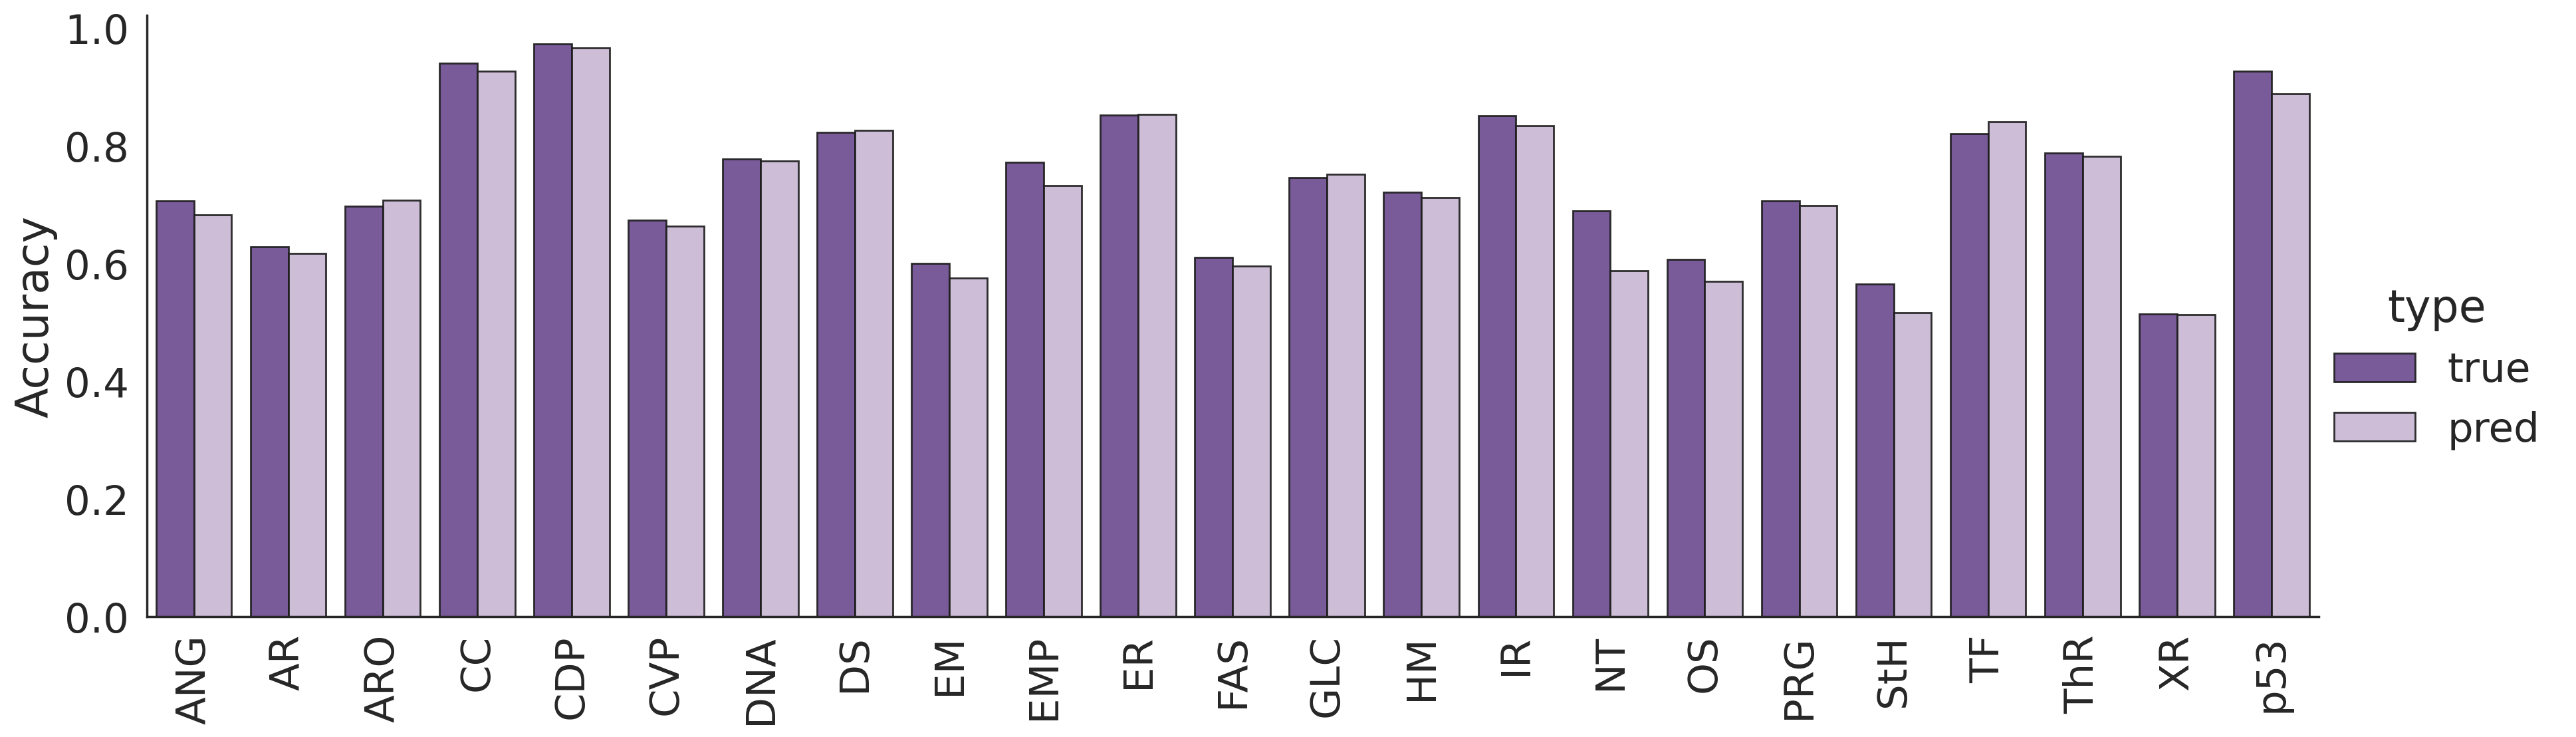

In [6]:
df = df.sort_values('acc_mean')
palettef = {"true":"#6a3d9a",
           "pred":"#ff7f00"}
palette2 = {"true":"#6a3d9a",
           "pred":"#cab2d6"}
#, "accuracy":'#d83128'
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale = 2)
sns.set_style("white")
rc = {'figure.figsize':(22,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.size' : 22}
plt.rcParams.update(rc)
hue_order = ['true', 'pred']
mech_order = df.sort_values('mech').mech.unique()
%config InlineBackend.figure_format = 'retina'
g = sns.catplot(
    data=df, kind="bar",
    x="mech", y="acc_mean", hue="type", 
    palette=palette2, alpha=.9, height=6, aspect = 3, edgecolor="k", hue_order = hue_order, 
    order = mech_order)
ax = g.facet_axis(0, 0)
plt.xticks(rotation=90)
g.set_axis_labels("", "Accuracy")
plt.savefig('../plots/massbank/cat_massbank_predtrue_fpssummary.svg', bbox_inches = 'tight', dpi = 300)

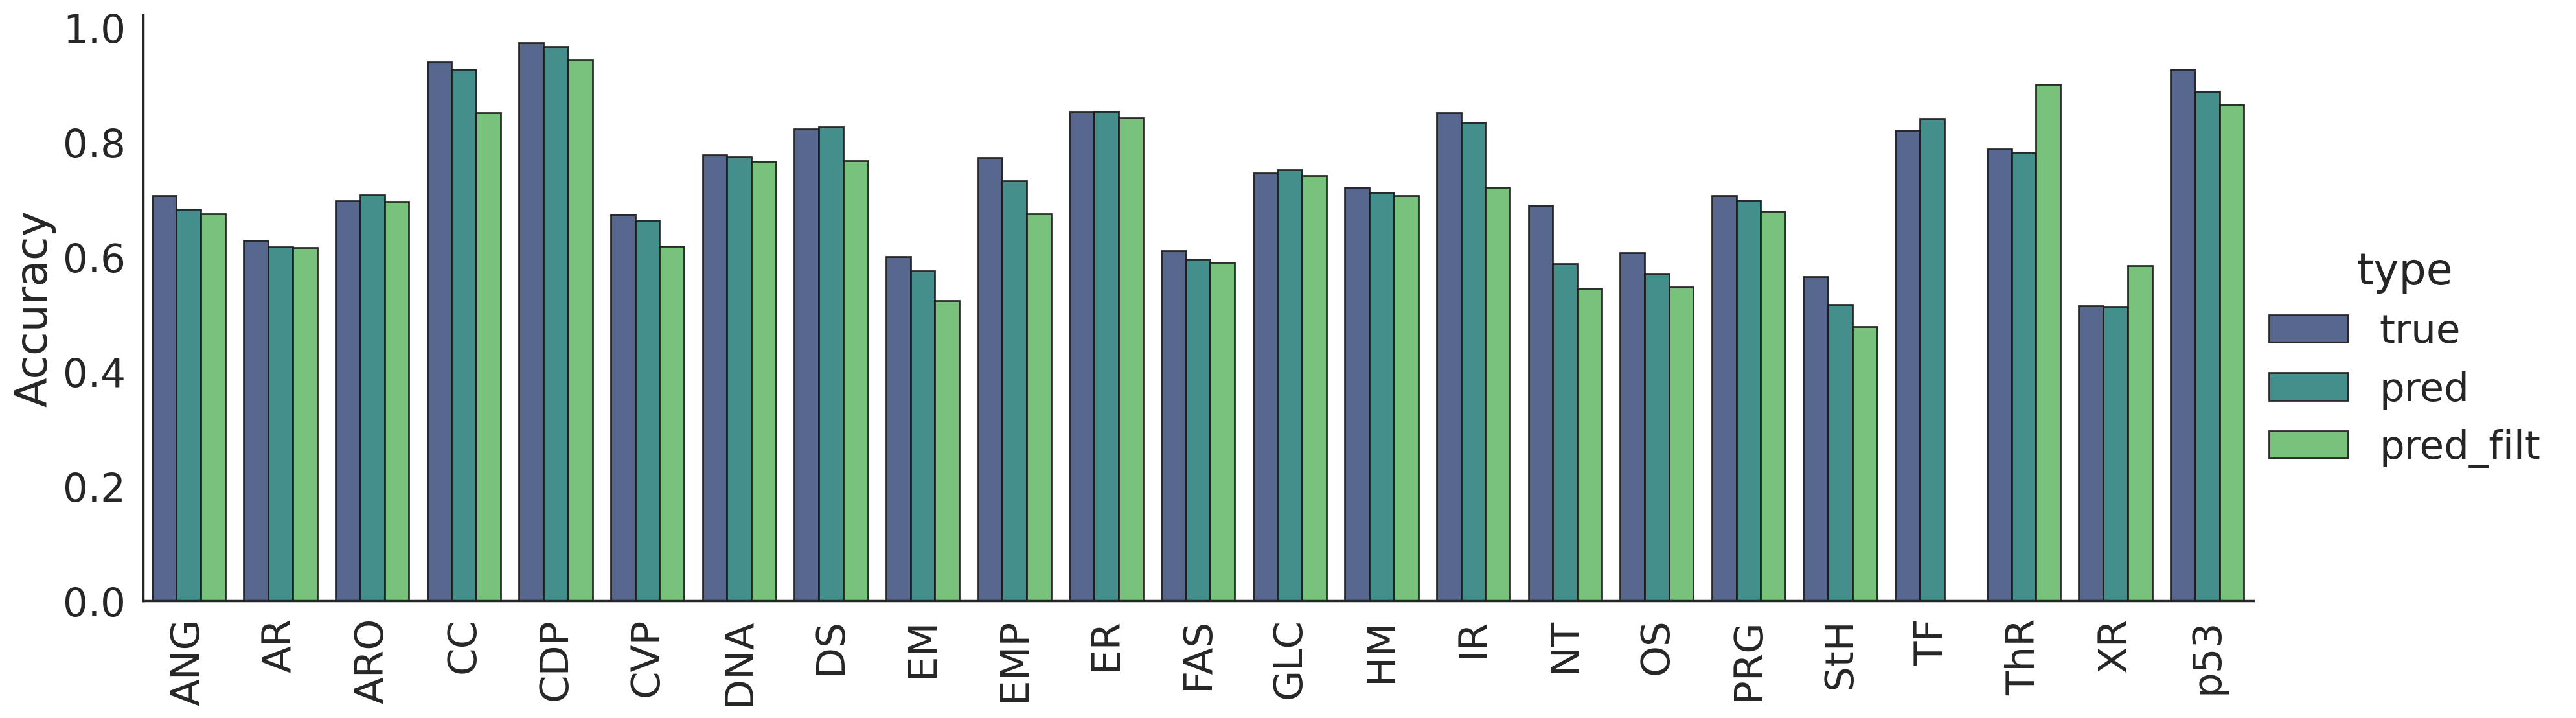

In [39]:
df3 = df2.sort_values('acc_mean')
# group by mech and keep only the rows with the largest value of acc_mean within each group
max_acc = df2.groupby(['mech',"type"])['acc_mean'].max().reset_index()
# Merge with the original dataframe to keep only the rows with maximum acc_mean for each group
df3 = df3.merge(max_acc, on=['mech', "type", 'acc_mean'], how='inner')
palette2 = {"true": '#3b528b',
            "pred": '#21918c',
            "pred_filt": '#5ec962'}
# , "accuracy":'#d83128'
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale=2)
sns.set_style("white")
rc = {'figure.figsize': (22, 10),
      'axes.facecolor': 'white',
      'axes.grid': False,
      'grid.color': '.8',
      'font.size': 22}
plt.rcParams.update(rc)
hue_order = ['true', 'pred', 'pred_filt']
mech_order = df3.sort_values('mech').mech.unique()
%config InlineBackend.figure_format = 'retina'
g = sns.catplot(
    data=df3, kind="bar",
    x="mech", y="acc_mean", hue="type",
    palette=palette2, alpha=.9, height=6, aspect=3, edgecolor="k", hue_order=hue_order,
    order=mech_order)
ax = g.facet_axis(0, 0)
plt.xticks(rotation=90)
g.set_axis_labels("", "Accuracy")
plt.savefig('../plots/massbank/cat_massbank_predtrue_fpssummary2.svg',
            bbox_inches='tight', dpi=300)


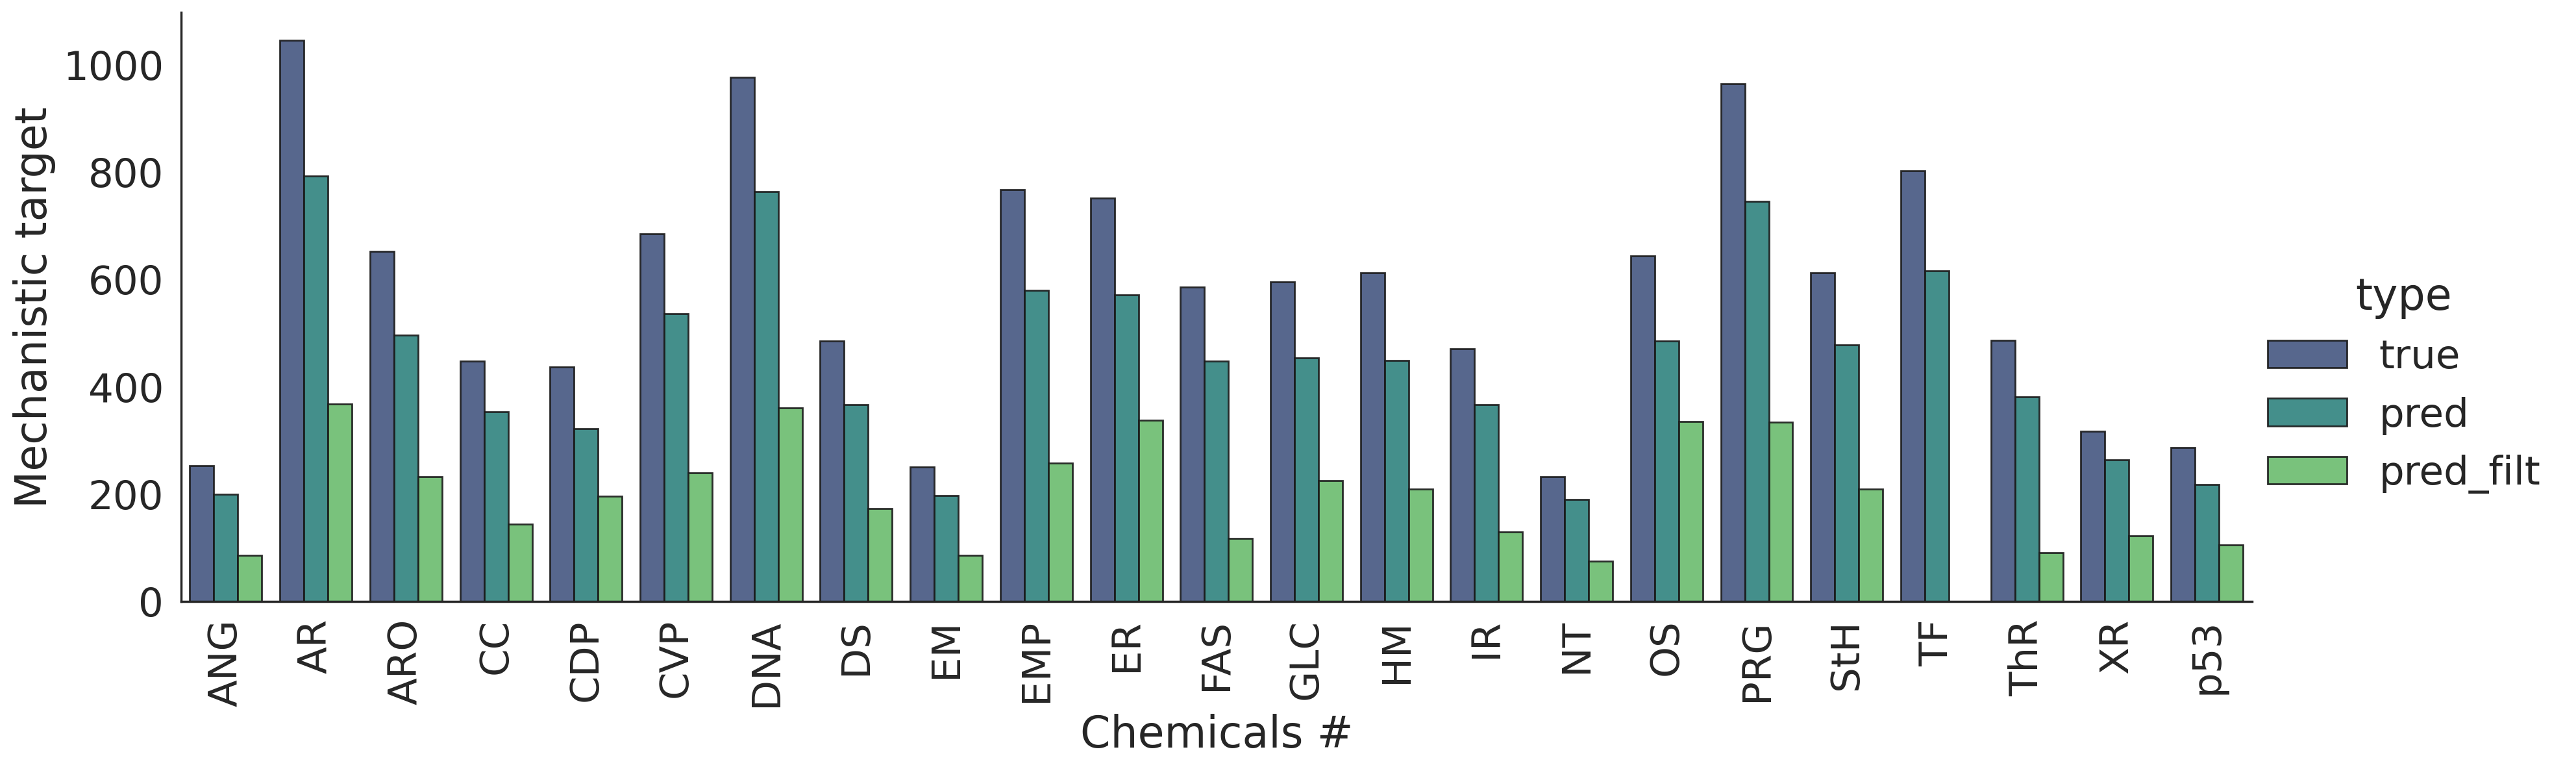

In [45]:
df3 = df2.sort_values('acc_mean')
# group by mech and keep only the rows with the largest value of acc_mean within each group
max_acc = df2.groupby(['mech', "type"])['acc_mean'].max().reset_index()
# Merge with the original dataframe to keep only the rows with maximum acc_mean for each group
df3 = df3.merge(max_acc, on=['mech', "type", 'acc_mean'], how='inner')
palette2 = {"true": '#3b528b',
            "pred": '#21918c',
            "pred_filt": '#5ec962'}
# , "accuracy":'#d83128'
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale=2)
sns.set_style("white")
rc = {'figure.figsize': (22, 10),
      'axes.facecolor': 'white',
      'axes.grid': False,
      'grid.color': '.8',
      'font.size': 22}
plt.rcParams.update(rc)
hue_order = ['true', 'pred', 'pred_filt']
mech_order = df3.sort_values('mech').mech.unique()
%config InlineBackend.figure_format = 'retina'
g = sns.catplot(
    data=df3, kind="bar",
    x="mech", y="dtxsid_mean", hue="type",
    palette=palette2, alpha=.9, height=6, aspect=3, edgecolor="k", hue_order=hue_order,
    order=mech_order)
ax = g.facet_axis(0, 0)
plt.xticks(rotation=90)
g.set_axis_labels("Chemicals #", "Mechanistic target")
plt.savefig('../plots/massbank/cat_massbank_predtrue_fpssummary2.svg',
            bbox_inches='tight', dpi=300)
